                                            ** THE SPARKS FOUNDATION **
                                                 ABHISHEK KUMAR
                                      DATA SCIENCE & BUSINESS ANALYTICS Intern  
                        TASK1 : PREDICT THE PERCENTAGE OF AN STUDENT BASED ON THE NUMBER OF STUDY HOURS

**In this project I will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.**

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries Imported Successfully")

Libraries Imported Successfully


#### Importing the dataset

In [2]:
dataset = pd.read_csv("student_data.csv") 
print("Data imported Successfully")

Data imported Successfully


#### Inspecting the dataset

In [3]:
#Print first 5 records of dataset
dataset.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Print last 5 records of dataset
dataset.tail() 

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Checking for missing values

In [6]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Visualizing data

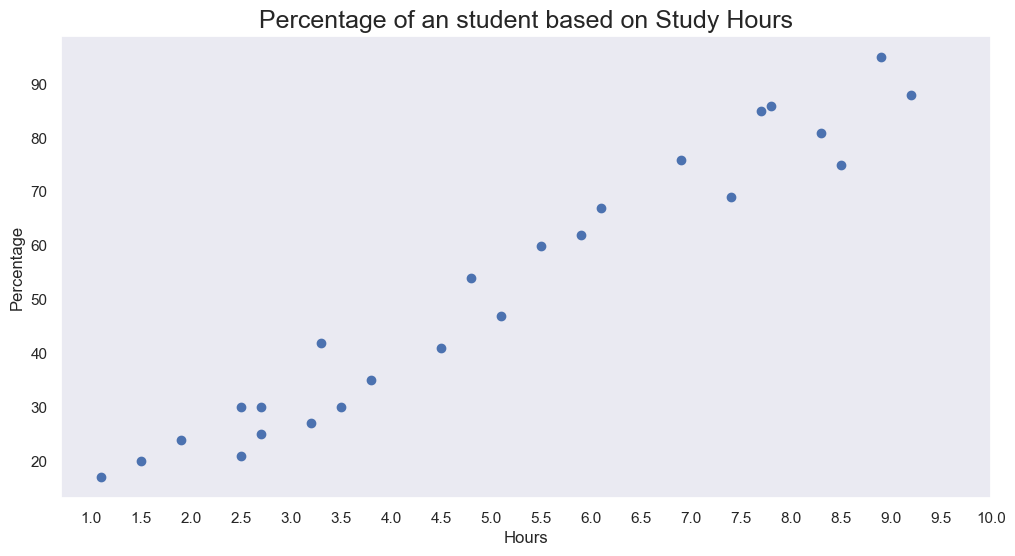

In [8]:
sns.set()
plt.figure(figsize=(12,6))
plt.scatter(dataset["Hours"],dataset["Scores"])
plt.title("Percentage of an student based on Study Hours",fontsize=18)
plt.xlabel("Hours",fontsize=12)
plt.ylabel("Percentage",fontsize=12)
plt.xticks(np.arange(1,10.0000001,0.5))
plt.grid()
plt.show()

#### Checking correlation between different features of dataset

In [9]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Converting DataFrame in ndarray

In [10]:
X = dataset.iloc[:, :-1].values   # converting DataFrame into ndarray(2D)
y = dataset.iloc[:,-1].values     # converting Series into ndarray(1D)

In [11]:
print(X[:5])

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]


In [12]:
print(y[:5])

[21 47 27 75 30]


## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)

In [14]:
print(X_train[:5])

[[7.7]
 [6.1]
 [7.4]
 [3.5]
 [3.2]]


In [15]:
print(y_train[:5])

[85 67 69 30 27]


In [16]:
print(X_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [17]:
print(y_test)

[17 42 24 75 54]


## Traning the simple Linear Regression model on the Training set

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Model Trained Successfully")

Model Trained Successfully


## Predict the Test Set Results

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [21]:
data = pd.DataFrame({'Actual':y_test,'predicted':y_pred})
print(data)

   Actual  predicted
0      17   9.970262
1      42  32.984700
2      24  18.339148
3      75  87.382463
4      54  48.676362


## Visualizing the Training set Results

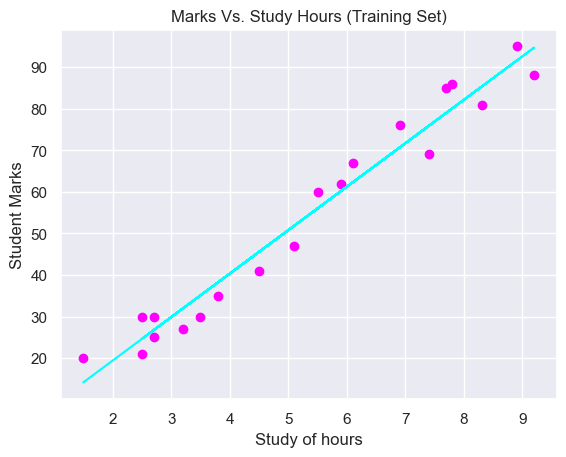

In [22]:
plt.scatter(X_train,y_train, color='magenta')
plt.plot(X_train,regressor.predict(X_train), color="cyan")
plt.title('Marks Vs. Study Hours (Training Set)')
plt.xlabel("Study of hours")
plt.ylabel("Student Marks")
plt.show()

## Visualizing the Test Set Results

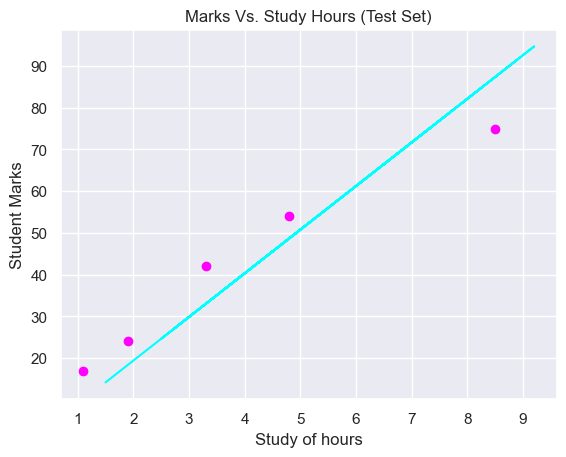

In [23]:
plt.scatter(X_test,y_test, color='magenta')
plt.plot(X_train,regressor.predict(X_train), color="cyan")
plt.title('Marks Vs. Study Hours (Test Set)')
plt.xlabel("Study of hours")
plt.ylabel("Student Marks")
plt.show()

#### Model Evaluation

In [29]:
from sklearn.metrics import mean_absolute_error
print("MAE",np.round(mean_absolute_error(y_test,y_pred),2))

MAE 7.88


### Final model for deliver to our senior councelor

In [59]:
study_hours = float(input("Enter no. of hours you want to give for your study in a day : "))
a=np.array(study_hours).reshape(-1,1)
pred = regressor.predict(a)
if a[0][0]>=8:
    ini="Excellent"
    print("\nYou made an {} decision for studying {} hours in a day, then I will say you can score {} percentage of Marks.".format(ini,a[0][0],np.round(pred[0],0)))
elif a[0][0]>5 and a[0][0]<8:
    ini="Average"
    print("\nYou made a {} decision for studying {} hours in a day, then I will say you can score {} percentage of Marks.".format(ini,a[0][0],np.round(pred[0],0)))
else:
    ini="poor"
    print("\nYou made a {} decision for studying {} hours in a day, then I will say you can score {} percentage of Marks.".format(ini,a[0][0],np.round(pred[0],0)))

Enter no. of hours you want to give for your study in a day : 8

You made an Excellent decision for studying 8.0 hours in a day, then I will say you can score 82.0 percentage of Marks.


## THANK YOU!